# SimCLR Training

## Loading libraries and requirements

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2


In [ ]:
!pip install tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 119.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.1 MB/s eta 0:00:00


In [ ]:
import torch_xla.distributed.parallel_loader as pl1

In [ ]:

import os
from copy import deepcopy


import matplotlib.pyplot as plt
plt.set_cmap('cividis')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.set()

from tqdm.notebook import tqdm

# Torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
from torch.utils.data import Subset

## Torchvision
import torchvision
from torchvision.datasets import STL10
from torchvision import transforms


# PyTorch Lightning
try:
    import pytorch_lightning as pl
except ModuleNotFoundError: # Google Colab does not have PyTorch Lightning installed by default. Hence, we do it here if necessary
    !pip install --quiet pytorch-lightning>=1.4
    import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint


from datasets import load_dataset
from datasets import concatenate_datasets
from datasets import DatasetDict
from datasets import Value

# Import tensorboard
%load_ext tensorboard


DATASET_PATH = "../data"
CHECKPOINT_PATH = "/content/drive/MyDrive/ms_nist/brain"
NUM_WORKERS = os.cpu_count()

# Setting the seed
pl.seed_everything(42)






<ipython-input-4-53e5274364bf>:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export
INFO:lightning_fabric.utilities.seed:Seed set to 42


<Figure size 640x480 with 0 Axes>

## Data preprocessing and augmentation

In [ ]:


ds = load_dataset("youngp5/BrainMRI")
ds2 = load_dataset("Mahadih534/brain-tumor-MRI-dataset")
ds2_t= load_dataset("Falah/Alzheimer_MRI",split="train")
ds2_test= load_dataset("Falah/Alzheimer_MRI",split="test")
ds3= load_dataset("BTX24/tekno21-brain-stroke-dataset-binary")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


BrainTumors.zip:   0%|          | 0.00/384M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7342 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/522 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/506 [00:00<?, ?it/s]

17%20no.jpg:   0%|          | 0.00/5.40k [00:00<?, ?B/s]

13%20no.jpg:   0%|          | 0.00/4.57k [00:00<?, ?B/s]

11%20no.jpg:   0%|          | 0.00/3.48k [00:00<?, ?B/s]

18%20no.jpg:   0%|          | 0.00/5.87k [00:00<?, ?B/s]

23%20no.jpg:   0%|          | 0.00/8.90k [00:00<?, ?B/s]

15%20no.jpg:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

14%20no.jpg:   0%|          | 0.00/6.04k [00:00<?, ?B/s]

1%20no.jpeg:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

10%20no.jpg:   0%|          | 0.00/3.85k [00:00<?, ?B/s]

22%20no.jpg:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

24%20no.jpg:   0%|          | 0.00/5.88k [00:00<?, ?B/s]

20%20no.jpg:   0%|          | 0.00/7.82k [00:00<?, ?B/s]

21%20no.jpg:   0%|          | 0.00/5.82k [00:00<?, ?B/s]

19%20no.jpg:   0%|          | 0.00/5.84k [00:00<?, ?B/s]

12%20no.jpg:   0%|          | 0.00/4.14k [00:00<?, ?B/s]

2%20no.jpeg:   0%|          | 0.00/79.7k [00:00<?, ?B/s]

26%20no.jpg:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

25%20no.jpg:   0%|          | 0.00/7.88k [00:00<?, ?B/s]

35%20no.jpg:   0%|          | 0.00/6.02k [00:00<?, ?B/s]

29%20no.jpg:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

37%20no.jpg:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

30%20no.jpg:   0%|          | 0.00/9.34k [00:00<?, ?B/s]

32%20no.jpg:   0%|          | 0.00/5.96k [00:00<?, ?B/s]

3%20no.jpg:   0%|          | 0.00/5.93k [00:00<?, ?B/s]

31%20no.jpg:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

28%20no.jpg:   0%|          | 0.00/6.11k [00:00<?, ?B/s]

34%20no.jpg:   0%|          | 0.00/4.39k [00:00<?, ?B/s]

38%20no.jpg:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

4%20no.jpg:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

36%20no.jpg:   0%|          | 0.00/5.11k [00:00<?, ?B/s]

33%20no.jpg:   0%|          | 0.00/5.13k [00:00<?, ?B/s]

39%20no.jpg:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

44no.jpg:   0%|          | 0.00/19.2k [00:00<?, ?B/s]

46%20no.jpg:   0%|          | 0.00/59.9k [00:00<?, ?B/s]

49%20no.jpg:   0%|          | 0.00/5.19k [00:00<?, ?B/s]

40%20no.jpg:   0%|          | 0.00/5.76k [00:00<?, ?B/s]

5%20no.jpg:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

48%20no.jpeg:   0%|          | 0.00/34.9k [00:00<?, ?B/s]

50%20no.jpg:   0%|          | 0.00/6.14k [00:00<?, ?B/s]

43%20no.jpg:   0%|          | 0.00/5.79k [00:00<?, ?B/s]

47%20no.jpg:   0%|          | 0.00/4.44k [00:00<?, ?B/s]

6%20no.jpg:   0%|          | 0.00/3.68k [00:00<?, ?B/s]

7%20no.jpg:   0%|          | 0.00/76.4k [00:00<?, ?B/s]

45%20no.jpg:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

N1.JPG:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

N16.jpg:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

N11.jpg:   0%|          | 0.00/31.8k [00:00<?, ?B/s]

N21.jpg:   0%|          | 0.00/97.7k [00:00<?, ?B/s]

N17.jpg:   0%|          | 0.00/32.6k [00:00<?, ?B/s]

N3.jpg:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

N2.JPG:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

N15.jpg:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

N19.JPG:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

N22.JPG:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

N6.jpg:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

N20.JPG:   0%|          | 0.00/17.1k [00:00<?, ?B/s]

No11.jpg:   0%|          | 0.00/82.3k [00:00<?, ?B/s]

No12.jpg:   0%|          | 0.00/38.9k [00:00<?, ?B/s]

No13.jpg:   0%|          | 0.00/22.1k [00:00<?, ?B/s]

No14.jpg:   0%|          | 0.00/15.3k [00:00<?, ?B/s]

No15.jpg:   0%|          | 0.00/119k [00:00<?, ?B/s]

No21.jpg:   0%|          | 0.00/35.4k [00:00<?, ?B/s]

no%20100.jpg:   0%|          | 0.00/4.26k [00:00<?, ?B/s]

N26.JPG:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

No18.jpg:   0%|          | 0.00/160k [00:00<?, ?B/s]

no%202.jpg:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

no%203.jpg:   0%|          | 0.00/6.23k [00:00<?, ?B/s]

no%205.jpeg:   0%|          | 0.00/28.4k [00:00<?, ?B/s]

No16.jpg:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

No20.jpg:   0%|          | 0.00/28.3k [00:00<?, ?B/s]

No19.jpg:   0%|          | 0.00/200k [00:00<?, ?B/s]

no%2090.jpg:   0%|          | 0.00/15.0k [00:00<?, ?B/s]

no%208.jpg:   0%|          | 0.00/26.7k [00:00<?, ?B/s]

no%206.jpg:   0%|          | 0.00/7.95k [00:00<?, ?B/s]

no%209.png:   0%|          | 0.00/728k [00:00<?, ?B/s]

No22.jpg:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

no%2092.jpg:   0%|          | 0.00/5.03k [00:00<?, ?B/s]

no%20923.jpg:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

no%2089.jpg:   0%|          | 0.00/38.4k [00:00<?, ?B/s]

no%2010.jpg:   0%|          | 0.00/43.3k [00:00<?, ?B/s]

no%2095.jpg:   0%|          | 0.00/40.2k [00:00<?, ?B/s]

no%2096.jpg:   0%|          | 0.00/306k [00:00<?, ?B/s]

no%2097.jpg:   0%|          | 0.00/28.3k [00:00<?, ?B/s]

Y103.jpg:   0%|          | 0.00/131k [00:00<?, ?B/s]

no.jpg:   0%|          | 0.00/188k [00:00<?, ?B/s]

no%2099.jpg:   0%|          | 0.00/41.5k [00:00<?, ?B/s]

no%2098.jpg:   0%|          | 0.00/158k [00:00<?, ?B/s]

Y100.JPG:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

Y1.jpg:   0%|          | 0.00/5.11k [00:00<?, ?B/s]

Y101.jpg:   0%|          | 0.00/55.0k [00:00<?, ?B/s]

Y102.jpg:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

Y104.jpg:   0%|          | 0.00/98.3k [00:00<?, ?B/s]

Y10.jpg:   0%|          | 0.00/8.53k [00:00<?, ?B/s]

Y105.jpg:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

Y111.JPG:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

Y108.jpg:   0%|          | 0.00/114k [00:00<?, ?B/s]

Y107.jpg:   0%|          | 0.00/87.2k [00:00<?, ?B/s]

Y106.jpg:   0%|          | 0.00/6.16k [00:00<?, ?B/s]

Y109.JPG:   0%|          | 0.00/23.2k [00:00<?, ?B/s]

Y11.jpg:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

Y116.JPG:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

Y112.JPG:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

Y115.JPG:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

Y114.JPG:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

Y113.JPG:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

Y117.JPG:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

Y13.jpg:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

Y120.JPG:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

no%2091.jpeg:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

Y147.JPG:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

Y15.jpg:   0%|          | 0.00/17.0k [00:00<?, ?B/s]

Y146.JPG:   0%|          | 0.00/24.8k [00:00<?, ?B/s]

Y156.JPG:   0%|          | 0.00/33.1k [00:00<?, ?B/s]

Y12.jpg:   0%|          | 0.00/29.2k [00:00<?, ?B/s]

Y14.jpg:   0%|          | 0.00/30.3k [00:00<?, ?B/s]

Y148.JPG:   0%|          | 0.00/24.9k [00:00<?, ?B/s]

Y155.JPG:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

Y158.JPG:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

Y159.JPG:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

Y16.JPG:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Y157.JPG:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

Y160.JPG:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

Y161.JPG:   0%|          | 0.00/24.1k [00:00<?, ?B/s]

Y154.jpg:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Y153.jpg:   0%|          | 0.00/31.1k [00:00<?, ?B/s]

Y166.JPG:   0%|          | 0.00/20.4k [00:00<?, ?B/s]

Y163.JPG:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

Y180.jpg:   0%|          | 0.00/60.3k [00:00<?, ?B/s]

Y165.JPG:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

Y168.jpg:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Y167.JPG:   0%|          | 0.00/36.9k [00:00<?, ?B/s]

Y18.JPG:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

Y184.JPG:   0%|          | 0.00/13.8k [00:00<?, ?B/s]

Y164.JPG:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

Y187.jpg:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

Y188.jpg:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

Y170.JPG:   0%|          | 0.00/26.2k [00:00<?, ?B/s]

Y182.JPG:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

Y186.jpg:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

Y183.jpg:   0%|          | 0.00/32.6k [00:00<?, ?B/s]

Y185.jpg:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

Y192.JPG:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

Y20.jpg:   0%|          | 0.00/24.6k [00:00<?, ?B/s]

Y195.JPG:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

Y22.jpg:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

Y19.JPG:   0%|          | 0.00/20.6k [00:00<?, ?B/s]

Y21.jpg:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

Y2.jpg:   0%|          | 0.00/12.4k [00:00<?, ?B/s]

Y246.JPG:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

Y24.jpg:   0%|          | 0.00/305k [00:00<?, ?B/s]

Y23.JPG:   0%|          | 0.00/18.2k [00:00<?, ?B/s]

Y242.JPG:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

Y193.JPG:   0%|          | 0.00/22.3k [00:00<?, ?B/s]

Y243.JPG:   0%|          | 0.00/19.4k [00:00<?, ?B/s]

Y245.jpg:   0%|          | 0.00/5.82k [00:00<?, ?B/s]

Y244.JPG:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

Y247.JPG:   0%|          | 0.00/21.7k [00:00<?, ?B/s]

Y251.JPG:   0%|          | 0.00/23.0k [00:00<?, ?B/s]

Y194.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

Y249.JPG:   0%|          | 0.00/29.3k [00:00<?, ?B/s]

Y250.jpg:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

Y252.jpg:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

Y255.JPG:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

Y258.JPG:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

Y259.JPG:   0%|          | 0.00/18.3k [00:00<?, ?B/s]

Y253.JPG:   0%|          | 0.00/19.3k [00:00<?, ?B/s]

Y254.jpg:   0%|          | 0.00/4.84k [00:00<?, ?B/s]

Y256.JPG:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

Y257.jpg:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

Y27.jpg:   0%|          | 0.00/38.0k [00:00<?, ?B/s]

Y29.jpg:   0%|          | 0.00/25.9k [00:00<?, ?B/s]

Y248.JPG:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

Y30.jpg:   0%|          | 0.00/15.9k [00:00<?, ?B/s]

Y28.jpg:   0%|          | 0.00/40.0k [00:00<?, ?B/s]

Y32.jpg:   0%|          | 0.00/29.8k [00:00<?, ?B/s]

Y3.jpg:   0%|          | 0.00/46.7k [00:00<?, ?B/s]

Y36.JPG:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

Y39.jpg:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Y26.jpg:   0%|          | 0.00/33.2k [00:00<?, ?B/s]

Y4.jpg:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

Y35.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

Y31.jpg:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

Y40.JPG:   0%|          | 0.00/23.5k [00:00<?, ?B/s]

Y25.jpg:   0%|          | 0.00/31.1k [00:00<?, ?B/s]

Y50.JPG:   0%|          | 0.00/21.8k [00:00<?, ?B/s]

Y42.jpg:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

Y44.JPG:   0%|          | 0.00/23.6k [00:00<?, ?B/s]

Y46.jpg:   0%|          | 0.00/56.8k [00:00<?, ?B/s]

Y49.JPG:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

Y51.jpg:   0%|          | 0.00/98.9k [00:00<?, ?B/s]

Y41.jpg:   0%|          | 0.00/233k [00:00<?, ?B/s]

Y47.JPG:   0%|          | 0.00/27.1k [00:00<?, ?B/s]

Y45.JPG:   0%|          | 0.00/21.9k [00:00<?, ?B/s]

Y55.jpg:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

Y53.jpg:   0%|          | 0.00/5.01k [00:00<?, ?B/s]

Y56.jpg:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

Y59.JPG:   0%|          | 0.00/17.9k [00:00<?, ?B/s]

Y6.jpg:   0%|          | 0.00/86.6k [00:00<?, ?B/s]

Y73.jpg:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

Y58.JPG:   0%|          | 0.00/21.2k [00:00<?, ?B/s]

Y71.JPG:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

Y66.JPG:   0%|          | 0.00/19.1k [00:00<?, ?B/s]

Y65.JPG:   0%|          | 0.00/16.1k [00:00<?, ?B/s]

Y60.jpg:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

Y67.JPG:   0%|          | 0.00/20.2k [00:00<?, ?B/s]

Y7.jpg:   0%|          | 0.00/26.9k [00:00<?, ?B/s]

Y52.jpg:   0%|          | 0.00/61.2k [00:00<?, ?B/s]

Y76.jpg:   0%|          | 0.00/19.2k [00:00<?, ?B/s]

Y77.jpg:   0%|          | 0.00/12.9k [00:00<?, ?B/s]

Y61.jpg:   0%|          | 0.00/65.6k [00:00<?, ?B/s]

Y75.JPG:   0%|          | 0.00/23.2k [00:00<?, ?B/s]

Y8.jpg:   0%|          | 0.00/40.9k [00:00<?, ?B/s]

Y81.jpg:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

Y9.jpg:   0%|          | 0.00/49.4k [00:00<?, ?B/s]

Y85.JPG:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

Y95.jpg:   0%|          | 0.00/5.47k [00:00<?, ?B/s]

Y86.JPG:   0%|          | 0.00/21.5k [00:00<?, ?B/s]

Y78.jpg:   0%|          | 0.00/7.76k [00:00<?, ?B/s]

Y89.JPG:   0%|          | 0.00/18.5k [00:00<?, ?B/s]

Y91.jpg:   0%|          | 0.00/171k [00:00<?, ?B/s]

Y82.jpg:   0%|          | 0.00/5.02k [00:00<?, ?B/s]

Y97.JPG:   0%|          | 0.00/21.4k [00:00<?, ?B/s]

Y98.JPG:   0%|          | 0.00/19.8k [00:00<?, ?B/s]

Y96.jpg:   0%|          | 0.00/81.9k [00:00<?, ?B/s]

Y90.jpg:   0%|          | 0.00/91.2k [00:00<?, ?B/s]

Y92.jpg:   0%|          | 0.00/5.19k [00:00<?, ?B/s]

Y92.png:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

Y99.JPG:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/506 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

(…)-00000-of-00001-c08a401c53fe5312.parquet:   0%|          | 0.00/22.6M [00:00<?, ?B/s]

(…)-00000-of-00001-44110b9df98c5585.parquet:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5120 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1280 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/3.94k [00:00<?, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/288M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/291M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7369 [00:00<?, ? examples/s]

In [ ]:
ds3["train"]

Dataset({
    features: ['image', 'label'],
    num_rows: 7369
})

In [ ]:
ds2_test

Dataset({
    features: ['image', 'label'],
    num_rows: 1280
})

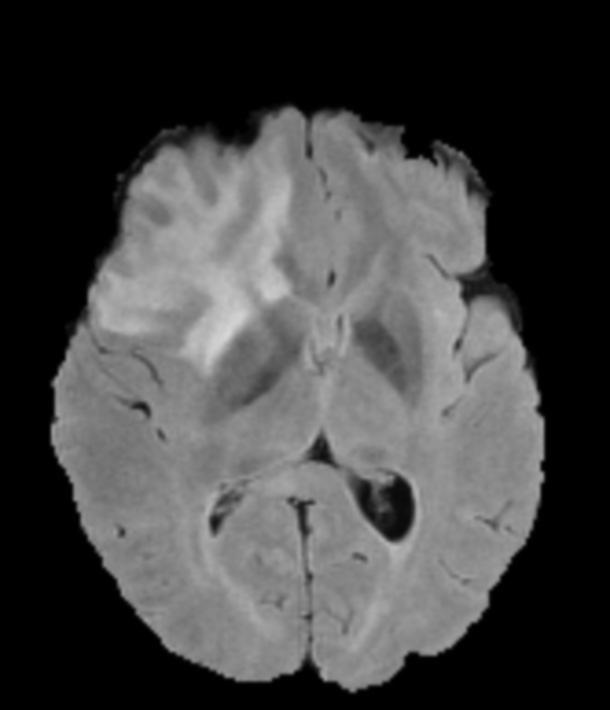

In [ ]:
ds['train'][5]["image"]

In [ ]:
f
# Convert labels to int64 (remove ClassLabel)
ds = ds.cast_column("label", Value("int64"))

ds3 = ds3.cast_column("label", Value("int64"))
ds2_t = ds2_t.cast_column("label", Value("int64"))
ds2_test = ds2_test.cast_column("label", Value("int64"))
merged_train = concatenate_datasets([
    ds['train'], ds2_t,ds2_test,ds2['train'], ds3['train']
])


merged_dataset = DatasetDict({'train': merged_train})


In [ ]:


resize_transform = transforms.Resize((128, 128))
grayscale=transforms.Grayscale(num_output_channels=3)
def resize_example(example):

    example['image'] = grayscale(example['image'])
    example['image'] = resize_transform(example['image'])
    return example


merged_dataset = merged_dataset.map(resize_example)
merged_dataset = merged_dataset.shuffle(seed=42)
merged_dataset = merged_dataset['train'].train_test_split(test_size=0.1)

Map:   0%|          | 0/21617 [00:00<?, ? examples/s]

In [ ]:
merged_dataset = merged_dataset.map(lambda x: {'label': -1})

Map:   0%|          | 0/19455 [00:00<?, ? examples/s]

Map:   0%|          | 0/2162 [00:00<?, ? examples/s]

In [ ]:
class ContrastiveTransformations(object):

    def __init__(self, base_transforms, n_views=2):
        self.base_transforms = base_transforms
        self.n_views = n_views

    def __call__(self, x):
        return [self.base_transforms(x) for i in range(self.n_views)]

In [ ]:



class AddGaussianNoise(object):
    def __init__(self, mean=0., std=0.01):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        return tensor + torch.randn_like(tensor) * self.std + self.mean

    def __repr__(self):
        return f"{self.__class__.__name__}(mean={self.mean}, std={self.std})"

contrast_transforms = transforms.Compose([
    # Resize to fixed size
    transforms.RandomHorizontalFlip(),
    transforms.RandomResizedCrop(size=128,scale=(0.2,1)),
    transforms.RandomRotation(degrees=30),
      transforms.RandomAffine(degrees=10, translate=(0.05, 0.05), scale=(0.95, 1.05)),
    transforms.GaussianBlur(kernel_size=9),
    transforms.ToTensor(),AddGaussianNoise(0.01),

    transforms.Normalize(mean=(0.5,), std=(0.5,))


])


In [ ]:


contrastive_transform = ContrastiveTransformations(contrast_transforms, n_views=2)
class SimCLRDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform, n_views=2):
        self.dataset = dataset
        self.transform = transform
        self.n_views = n_views


    def __getitem__(self, idx):
        img = self.dataset[idx]['image']
        label = self.dataset[idx]['label']
        views = [self.transform(img)  for _ in range(self.n_views)]

        return views, label

    def __len__(self):
        return len(self.dataset)
#.repeat(3, 1, 1)

In [ ]:
merged_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 19455
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 2162
    })
})

In [ ]:
simclr_dataset = SimCLRDataset(merged_dataset['train'], contrast_transforms)


In [ ]:
simclr_test=SimCLRDataset(merged_dataset['test'], contrast_transforms)

In [ ]:
simclr_test[5][0]

[tensor([[[-1.0057, -0.9978, -0.9442,  ..., -0.9636, -0.9793, -1.0079],
          [-0.9849, -0.9582, -0.9742,  ..., -0.9823, -0.9728, -0.9667],
          [-0.9376, -0.9730, -0.9964,  ..., -1.0118, -0.9938, -1.0044],
          ...,
          [-0.9659, -0.9891, -0.9784,  ..., -0.9785, -0.9558, -1.0155],
          [-1.0082, -0.9843, -0.9530,  ..., -0.9848, -0.9825, -0.9682],
          [-0.9763, -1.0045, -1.0056,  ..., -0.9880, -0.9213, -0.9700]],
 
         [[-0.9721, -1.0019, -0.9432,  ..., -0.9777, -0.9671, -0.9690],
          [-0.9859, -1.0019, -0.9802,  ..., -0.9394, -0.9933, -0.9949],
          [-0.9574, -0.9977, -0.9936,  ..., -0.9819, -0.9436, -1.0201],
          ...,
          [-0.9829, -0.9245, -0.9559,  ..., -0.9778, -0.9536, -0.9908],
          [-0.9539, -0.9485, -0.9804,  ..., -1.0207, -1.0147, -0.9792],
          [-0.9688, -1.0229, -1.0019,  ..., -0.9499, -0.9964, -0.9843]],
 
         [[-0.9833, -0.9558, -0.9683,  ..., -0.9859, -0.9480, -1.0021],
          [-1.0009, -0.9932,

In [ ]:
import os
import torch

from torch.utils.data import DataLoader


INFO:lightning_fabric.utilities.seed:Seed set to 42


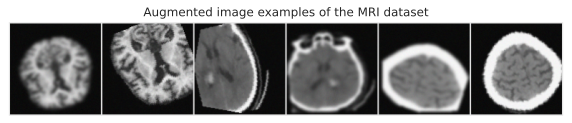

In [ ]:
# Visualize some examples
pl.seed_everything(42)
NUM_IMAGES = 3
imgs = torch.stack([img for idx in range(NUM_IMAGES) for img in simclr_test[idx][0]], dim=0)
img_grid = torchvision.utils.make_grid(imgs, nrow=6, normalize=True, pad_value=0.9)
img_grid = img_grid.permute(1, 2, 0)

plt.figure(figsize=(10,5))
plt.title('Augmented image examples of the MRI dataset')
plt.imshow(img_grid)
plt.axis('off')
plt.show()
plt.close()

## SimCLR architecture and trainer

In [ ]:
class SimCLR(pl.LightningModule):

    def __init__(self, hidden_dim, lr, temperature, weight_decay, max_epochs=200):
        super().__init__()
        self.save_hyperparameters()
        assert self.hparams.temperature > 0.0, 'The temperature must be a positive float!'
        # Base model f(.)
        self.convnet = torchvision.models.resnet18(num_classes=4*hidden_dim)  # Output of last linear layer
        # The MLP for g(.) consists of Linear->ReLU->Linear
        self.convnet.fc = nn.Sequential(
            self.convnet.fc,  # Linear(ResNet output, 4*hidden_dim)
            nn.ReLU(inplace=True),
            nn.Linear(4*hidden_dim, hidden_dim)
        )

    def configure_optimizers(self):
        optimizer = optim.AdamW(self.parameters(),
                                lr=self.hparams.lr,
                                weight_decay=self.hparams.weight_decay)
        lr_scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer,
                                                            T_max=self.hparams.max_epochs,
                                                            eta_min=self.hparams.lr/50)
        return [optimizer], [lr_scheduler]

    def info_nce_loss(self, batch, mode='train'):
        imgs, _ = batch
        imgs = torch.cat(imgs, dim=0)

        # Encode all images
        feats = self.convnet(imgs)
        # Calculate cosine similarity
        cos_sim = F.cosine_similarity(feats[:,None,:], feats[None,:,:], dim=-1)
        # Mask out cosine similarity to itself
        self_mask = torch.eye(cos_sim.shape[0], dtype=torch.bool, device=cos_sim.device)
        cos_sim.masked_fill_(self_mask, -9e15)
        # Find positive example -> batch_size//2 away from the original example
        pos_mask = self_mask.roll(shifts=cos_sim.shape[0]//2, dims=0)
        # InfoNCE loss
        cos_sim = cos_sim / self.hparams.temperature
        nll = -cos_sim[pos_mask] + torch.logsumexp(cos_sim, dim=-1)
        nll = nll.mean()

        # Logging loss
        self.log(mode+'_loss', nll)
        # Get ranking position of positive example
        comb_sim = torch.cat([cos_sim[pos_mask][:,None],  # First position positive example
                              cos_sim.masked_fill(pos_mask, -9e15)],
                             dim=-1)
        sim_argsort = comb_sim.argsort(dim=-1, descending=True).argmin(dim=-1)
        # Logging ranking metrics
        self.log(mode+'_acc_top1', (sim_argsort == 0).float().mean())
        self.log(mode+'_acc_top5', (sim_argsort < 5).float().mean())
        self.log(mode+'_acc_mean_pos', 1+sim_argsort.float().mean())

        return nll

    def training_step(self, batch, batch_idx):
        return self.info_nce_loss(batch, mode='train')

    def validation_step(self, batch, batch_idx):
        self.info_nce_loss(batch, mode='val')

In [ ]:
def train_simclr(batch_size, max_epochs=500, **kwargs):
    trainer = pl.Trainer(default_root_dir=os.path.join(CHECKPOINT_PATH, 'brain'),
                         accelerator="auto",
                         devices=1,log_every_n_steps=37,
                         max_epochs=max_epochs,
                         callbacks=[ModelCheckpoint(save_weights_only=True, mode='max', monitor='val_acc_top1'),
                                    LearningRateMonitor('epoch')])
    trainer.logger._default_hp_metric = None # Optional logging argument that we don't need


    train_loader = data.DataLoader(simclr_dataset, batch_size=batch_size, shuffle=True,
                                    drop_last=True, pin_memory=True,num_workers=94)

    val_loader = data.DataLoader(simclr_test, batch_size=batch_size, shuffle=False,
                                  drop_last=False, pin_memory=True,num_workers=94)

    pl.seed_everything(42) # To be reproducable
    model = SimCLR(max_epochs=max_epochs, **kwargs)
    trainer.fit(model, train_loader, val_loader)
    model = SimCLR.load_from_checkpoint(trainer.checkpoint_callback.best_model_path) # Load best checkpoint after training

    return model

In [ ]:
simclr_model = train_simclr(batch_size=512,
                            hidden_dim=128,
                            lr=5e-4,
                            temperature=0.07,
                            weight_decay=1e-4,
                            max_epochs=200)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: True, using: 1 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params | Mode 
-------------------------------------------
0 | convnet | ResNet | 11.5 M | train
-------------------------------------------
11.5 M    Trainable params
0         Non-trainable params
11.5 M    Total params
46.019    Total estimated model params size (MB)
71        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=200` reached.


In [ ]:
%tensorboard --logdir /content/drive/MyDrive/ms_nist/simclr/SimCLR/